# WORK IN PROGRESS

Predicting bitcoin price using Recurrent Neural Networks<br>
Explanation of how RNN works based on [Simeon Kostadinov Post](https://towardsdatascience.com/learn-how-recurrent-neural-networks-work-84e975feaaf7)

# Import Libraries

In [64]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.metrics import mean_squared_error

from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

**Numpy** for matrix manipulation. <br>
**Pandas** for defining data structures. <br>
**Matplotlib** for visualization. <br>
**SKlean** for normalizing data. <br>
**Keras** for training the model. <br>

# Prepare Data

Daily Bitcoin price for the last 3 years 2 (20.02.2021 - 19.02.2024) <br>
[DATA SOURCE](https://www.blockchain.com/explorer/charts/market-price)

In [65]:
df = pd.read_csv('market-price.csv')
df.drop(['Date'], axis=1, inplace=True)

## Split into train and test

First Approach just predict the last 30 days with train and test. For the future use other splitting methods.

In [66]:
#define the number of days to predict
days_pred = 30

df_train = df[:len(df)-days_pred]
df_test = df[len(df)-days_pred:]

## Normalize Data

In [67]:
train_set = df_train.values
train_set = min_max_scaler.fit_transform(train_set)

x_train = train_set[0:len(train_set)-1]
y_train = train_set[1:len(train_set)]

x_train = np.reshape(x_train, (len(x_train),1,1))

**Min_Max_Scaller**
This estimator scales and translates each feature individually such that it is in the given range on the training set <br>
    X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))<br>
    X_scaled = X_std * (max - min) + min'

# Train Model

Information for [LSTM Network](https://colah.github.io/posts/2015-08-Understanding-LSTMs/) and [GRU network](https://towardsdatascience.com/understanding-gru-networks-2ef37df6c9be) <br>

[KERAS Documentation](https://keras.io/api/layers/recurrent_layers/)

In [74]:
#Parameters
num_units = 4 # the number of units (dimension of the output state) used for the LSTM cel
activation_function = 'sigmoid' #the activation function used for the LSTM cell (sigmoid in our case)
optimizer = 'adam' #the optimizer used to minimize the loss function
#loss_function = 'mean_square_error' #the loss function which we need to minimize while adjusting the weights and biases of the network
batch_size = 100 #Number of examples we pick from our training set and use them for training
num_epochs = 500 #Number of iterations we need to make

#Initialize the RNN
reg = Sequential()

#Add Parameters to the LSTM layer
reg.add(LSTM(units=num_units, activation=activation_function, input_shape=(None, 1)))

#Add the output layer
reg.add(Dense(units=1))

#Compiling the RNN
reg.compile(optimizer= optimizer, loss = mean_squared_error)

#Apply the model to the train dataset
reg.fit(x_train, y_train, batch_size = batch_size, epochs = num_epochs)

Epoch 1/500
11/11 [==============================] - 1s 2ms/step - loss: 1.1176
Epoch 2/500
11/11 [==============================] - 0s 2ms/step - loss: 1.0580
Epoch 3/500
11/11 [==============================] - 0s 2ms/step - loss: 1.0010
Epoch 4/500
11/11 [==============================] - 0s 2ms/step - loss: 0.9471
Epoch 5/500
11/11 [==============================] - 0s 1ms/step - loss: 0.8960
Epoch 6/500
11/11 [==============================] - 0s 6ms/step - loss: 0.8476
Epoch 7/500
11/11 [==============================] - 0s 2ms/step - loss: 0.8020
Epoch 8/500
11/11 [==============================] - 0s 2ms/step - loss: 0.7587
Epoch 9/500
11/11 [==============================] - 0s 2ms/step - loss: 0.7182
Epoch 10/500
11/11 [==============================] - 0s 2ms/step - loss: 0.6796
Epoch 11/500
11/11 [==============================] - 0s 2ms/step - loss: 0.6431
Epoch 12/500
11/11 [==============================] - 0s 2ms/step - loss: 0.6090
Epoch 13/500
11/11 [=================

# Predict Price

In [75]:
#load test values
test_set = df_test.values

# Normalize Data
inputs = np.reshape(test_set, (len(test_set), 1))
inputs = min_max_scaler.transform(test_set)
inputs = np.reshape(test_set, (len(test_set),1,1))

#Predict price
predicted_price = reg.predict(inputs)
predicted_price = min_max_scaler.inverse_transform(predicted_price)

1/1 [==============================] - 0s 140ms/step


# Visualize Results

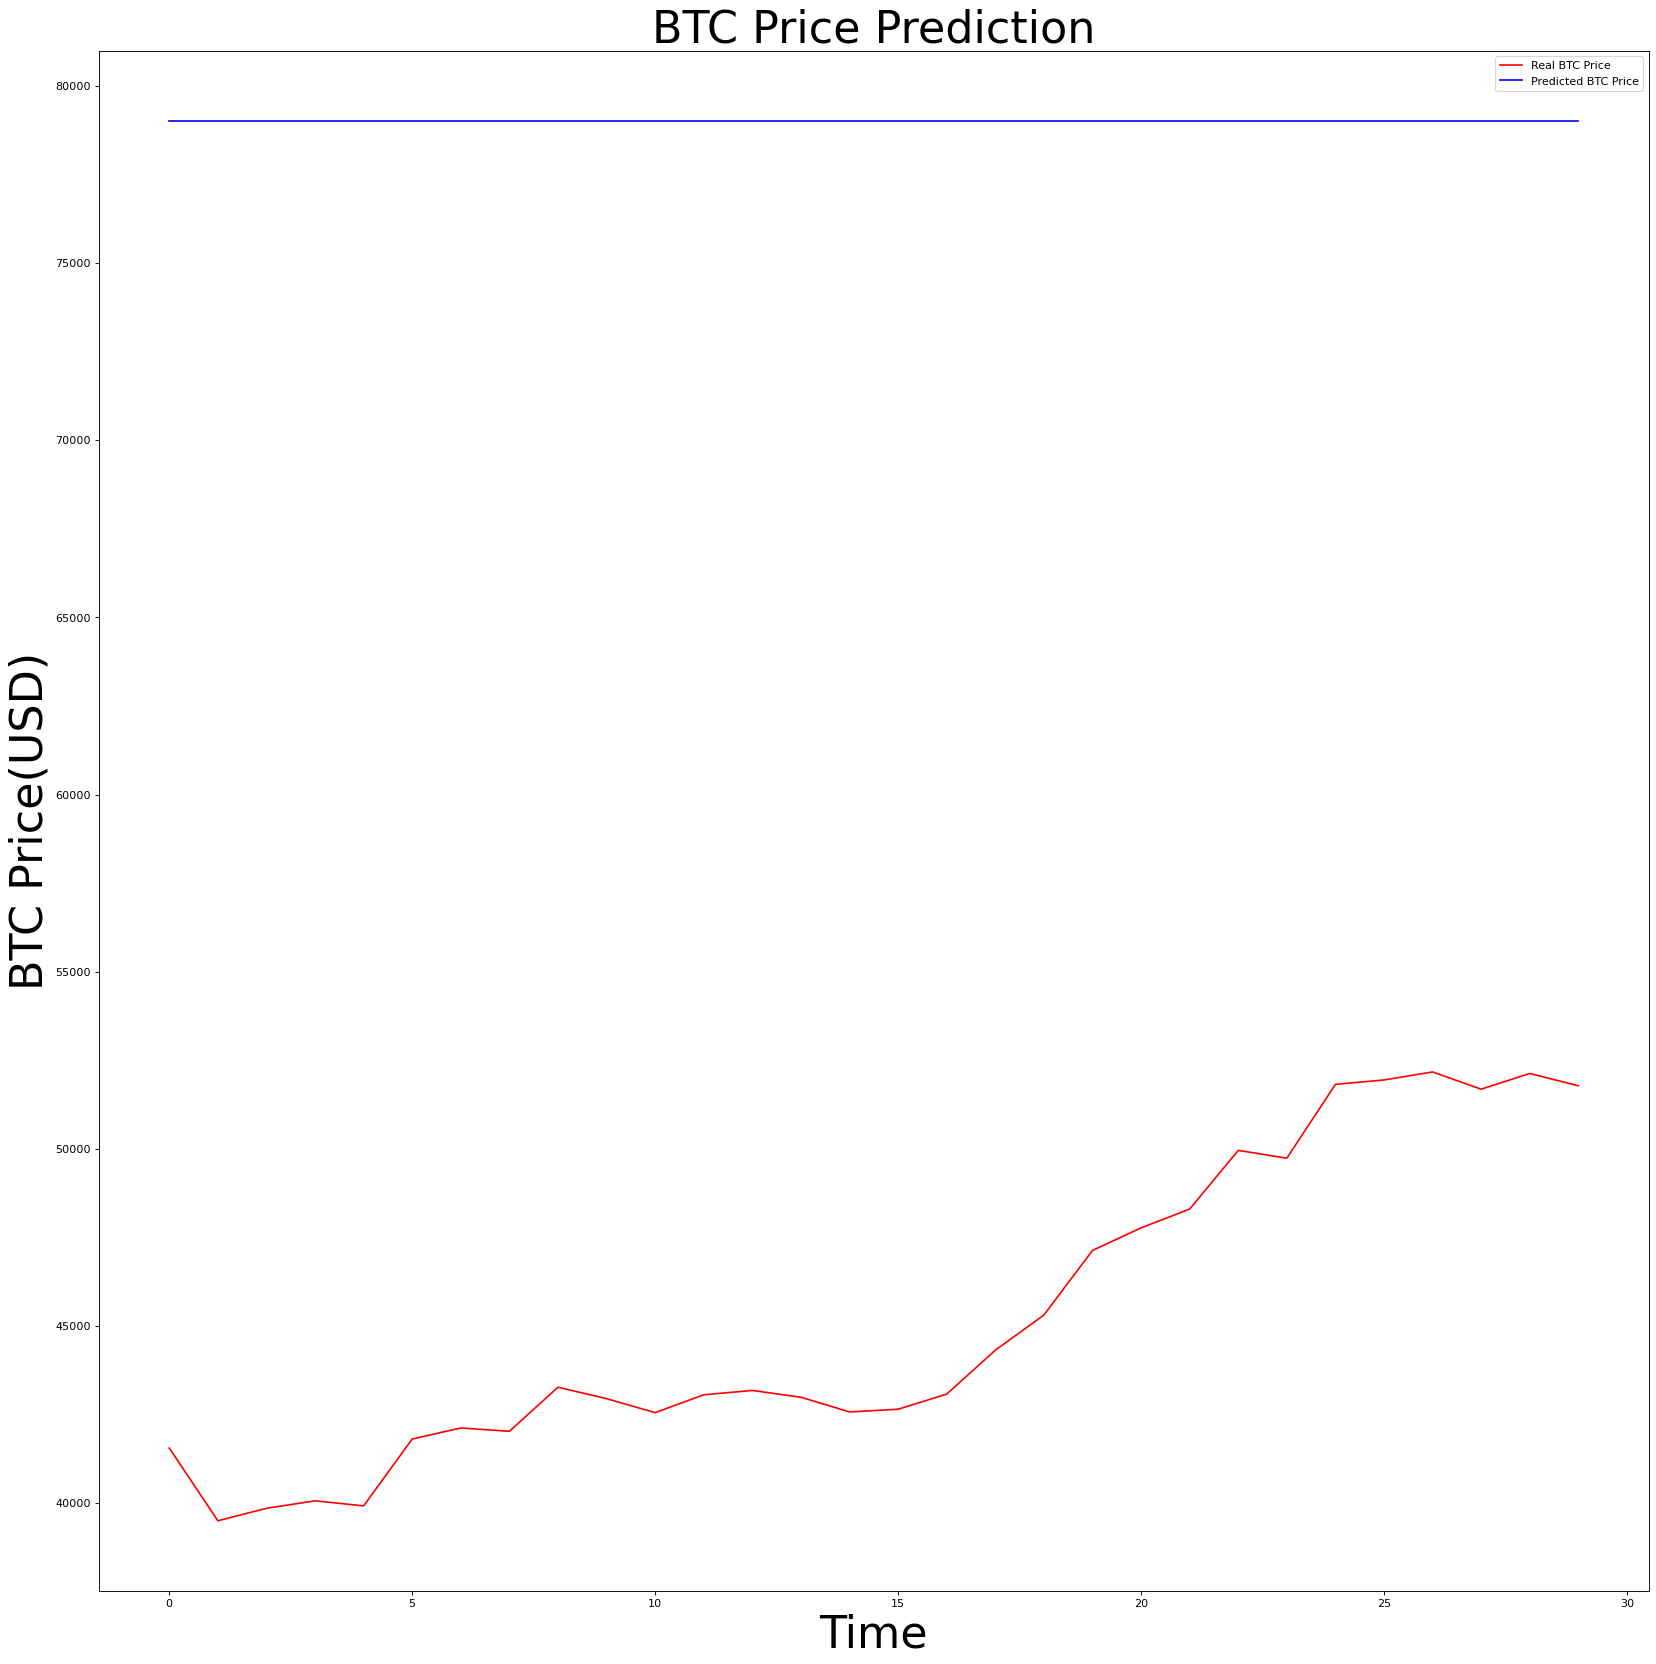

In [76]:
plt.figure(figsize=(25, 25), dpi=80, facecolor = 'w', edgecolor = 'k')

plt.plot(test_set[:, 0], color='red', label='Real BTC Price')
plt.plot(predicted_price[:, 0], color = 'blue', label = 'Predicted BTC Price')

plt.title('BTC Price Prediction', fontsize = 40)
plt.xlabel('Time', fontsize=40)
plt.ylabel('BTC Price(USD)', fontsize = 40)
plt.legend(loc = 'best')
plt.show()